In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set(style="ticks")

%matplotlib inline

In [7]:
df = pd.read_csv("data/gender.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [63]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


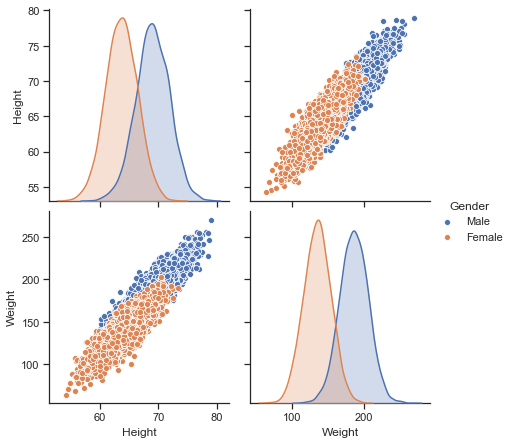

In [36]:
sns.pairplot(df, hue="Gender", height=3);

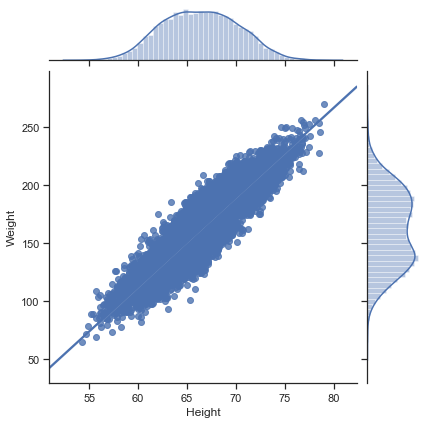

In [37]:
g = sns.jointplot("Height", "Weight", data=df[["Height", "Weight"]],
                  kind="reg", truncate=False, height=6)
plt.show()

              precision    recall  f1-score   support

      Female       0.91      0.93      0.92      1489
        Male       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



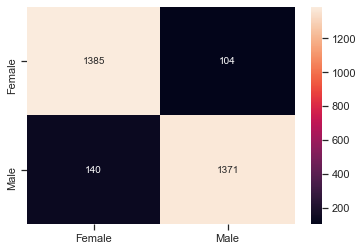

In [82]:
le = LabelEncoder()

X = df[["Height", "Weight"]].to_numpy()
y = le.fit_transform(df["Gender"].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(random_state=0, max_iter=500, n_jobs=-1).fit(X_train, y_train)
yh = clf.predict(X_test)

print(classification_report(y_test, yh, target_names=le.classes_))

cm = confusion_matrix(y_test, yh)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.show()